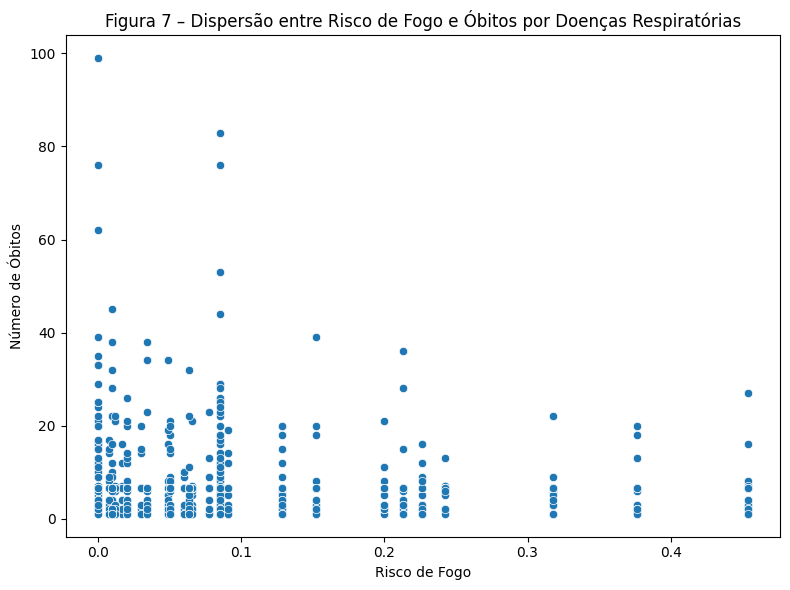

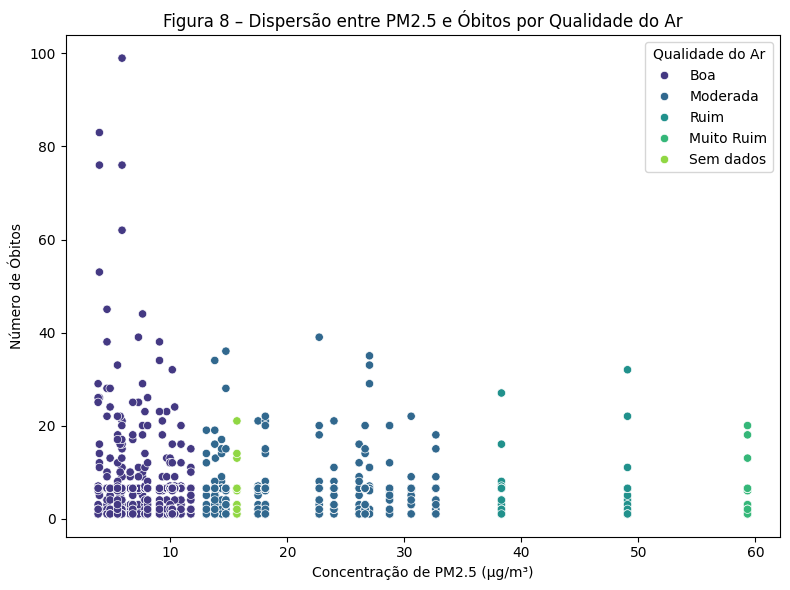

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega os dados
df = pd.read_csv('planilha_unificada.csv', sep=';')

# Converte colunas relevantes para numérico
cols = ['OBITOS', 'DIASEMCHUVA', 'PRECIPITACAO', 'RISCOFOGO', 'FRP', 'AREA_DESMATADA_KM2', 'pm2.5_atm']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Preenche nulos com a média geral da variável
df_filled = df.copy()
for col in cols:
    df_filled[col] = df[col].fillna(df[col].mean())



# ---------- Figura 7: Risco de Fogo vs. Óbitos ----------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filled, x='RISCOFOGO', y='OBITOS')
plt.title('Figura 7 – Dispersão entre Risco de Fogo e Óbitos por Doenças Respiratórias')
plt.xlabel('Risco de Fogo')
plt.ylabel('Número de Óbitos')
plt.tight_layout()
plt.show()

# ---------- Figura 8: PM2.5 vs. Óbitos com Qualidade do Ar ----------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filled, x='pm2.5_atm', y='OBITOS', hue='QUALIDADE_AR_CLASSIFICADA', palette='viridis')
plt.title('Figura 8 – Dispersão entre PM2.5 e Óbitos por Qualidade do Ar')
plt.xlabel('Concentração de PM2.5 (µg/m³)')
plt.ylabel('Número de Óbitos')
plt.legend(title='Qualidade do Ar')
plt.tight_layout()
plt.show()


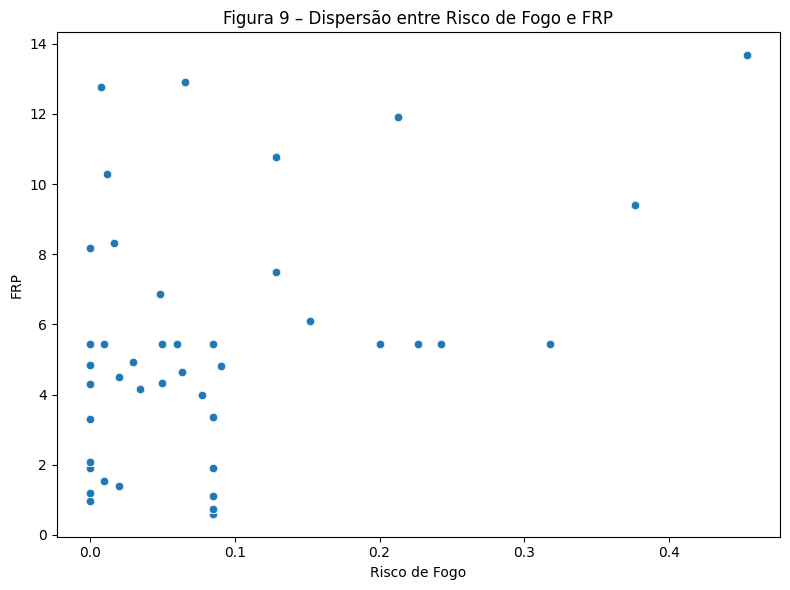

In [15]:
# ---------- Gráfico 2: FRP vs. Risco de Fogo ----------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filled, x='RISCOFOGO', y='FRP')
plt.title('Figura 9 – Dispersão entre Risco de Fogo e FRP')
plt.xlabel('Risco de Fogo')
plt.ylabel('FRP')
plt.tight_layout()
plt.show()



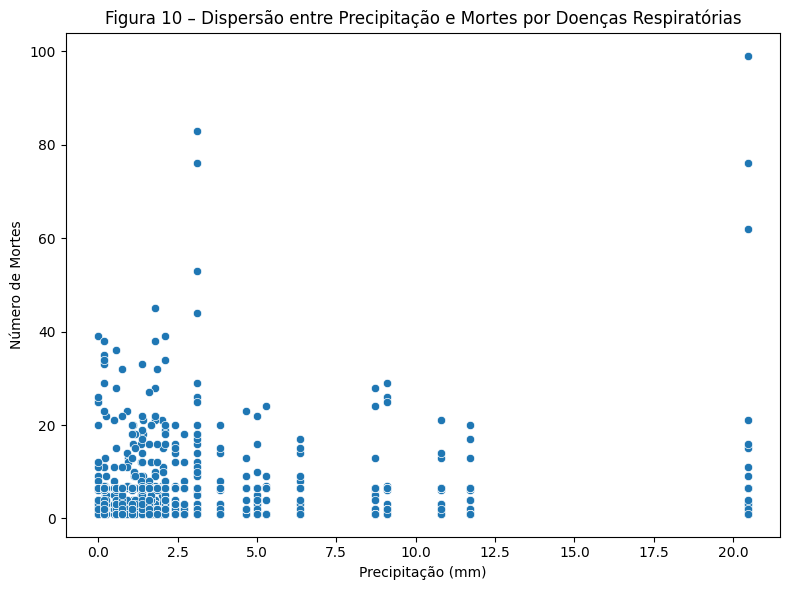

In [16]:
# ---------- Gráfico 3: Mortes vs. Precipitação ----------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filled, x='PRECIPITACAO', y='OBITOS')
plt.title('Figura 10 – Dispersão entre Precipitação e Mortes por Doenças Respiratórias')
plt.xlabel('Precipitação (mm)')
plt.ylabel('Número de Mortes')
plt.tight_layout()
plt.show()

In [17]:

# Garantir que colunas numéricas sejam tratadas corretamente
variaveis = ['OBITOS', 'DIASEMCHUVA', 'PRECIPITACAO', 'RISCOFOGO', 'FRP']
for var in variaveis:
    df[var] = pd.to_numeric(df[var], errors='coerce')

# Definir faixas para categorizar as variáveis
bins_dict = {
    'OBITOS': [0, 1, 10, 20, 50, 100],
    'DIASEMCHUVA': [0, 5, 10, 15, 20, 30],
    'PRECIPITACAO': [0, 2, 5, 10, 15, 25],
    'RISCOFOGO': [0, 0.05, 0.1, 0.2, 0.3, 0.5],
    'FRP': [0, 2, 4, 6, 10, 15]
}

# Criar colunas categorizadas e gerar frequências
for var, bins in bins_dict.items():
    df[f'{var}_faixa'] = pd.cut(df[var], bins=bins, include_lowest=True)

# Mostrar tabela de frequência
for var in variaveis:
    print(f'\nFrequência para {var}:')
    print(df[f'{var}_faixa'].value_counts().sort_index())



Frequência para OBITOS:
OBITOS_faixa
(-0.001, 1.0]    219
(1.0, 10.0]      294
(10.0, 20.0]      73
(20.0, 50.0]      45
(50.0, 100.0]      6
Name: count, dtype: int64

Frequência para DIASEMCHUVA:
DIASEMCHUVA_faixa
(-0.001, 5.0]    1148
(5.0, 10.0]        62
(10.0, 15.0]        0
(15.0, 20.0]        0
(20.0, 30.0]        0
Name: count, dtype: int64

Frequência para PRECIPITACAO:
PRECIPITACAO_faixa
(-0.001, 2.0]    716
(2.0, 5.0]       302
(5.0, 10.0]      128
(10.0, 15.0]      62
(15.0, 25.0]      32
Name: count, dtype: int64

Frequência para RISCOFOGO:
RISCOFOGO_faixa
(-0.001, 0.05]    638
(0.05, 0.1]       150
(0.1, 0.2]        119
(0.2, 0.3]         86
(0.3, 0.5]         91
Name: count, dtype: int64

Frequência para FRP:
FRP_faixa
(-0.001, 2.0]    280
(2.0, 4.0]       121
(4.0, 6.0]       252
(6.0, 10.0]      181
(10.0, 15.0]     190
Name: count, dtype: int64
